In [2]:
A=[4,3]
B=[0,0]
C=[3,-4]
import numpy as np
# Векторное произведение
a = np.array([4,3])
b = np.array([3,-4])
c = np.cross(a, b)
S = np.sqrt(np.dot(c,c))

print("Площадь треугольника равна" , S/2)

Площадь треугольника равна 12.5


In [9]:
import math 

import sympy as sm
from sympy import symbols, diff, sin, cos
import numpy as np
import matplotlib.pyplot as plt

#переменная
x = symbols('x')
#точность вычисления
eps = 1.e-12 
#уравнение f(x)=0
f = sin(cos(x))-2*x
f

-2*x + sin(cos(x))

In [10]:
#производная функции f по переменной x
df = diff(f,x)
#значение производной в точке n
df_n = sm.lambdify(x, df, "numpy")
#значение функции в точке n
f_n = sm.lambdify(x, f, "numpy")
#начальное приближение
x_n = 5.

for i in range (100000):
    x_N = x_n - f_n(x_n) / df_n(x_n) 
    if abs(x_N-x_n) > eps:
        x_n = x_N
    else:
        break
        
print(x_N)

0.39831945233667315


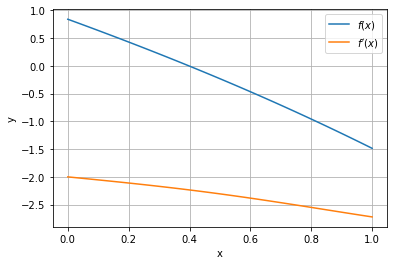

In [12]:
# построим график функции f(x)и её производной:
a = 0
b = 1
xx = np.linspace(a, b, 101)
yy = f_n(xx)
dyy = df_n(xx)

plt.plot(xx, yy, label='$f(x)$')
plt.plot(xx, dyy, label="$f'(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np
from numpy.linalg import matrix_rank

In [14]:
def gauss(A, b):
#проверим систему на совместность    
    Ab = np.vstack((np.transpose(A),b))
    if matrix_rank(A) != matrix_rank(Ab):
        print('У данной системы нет решений')
        return(-2)
    elif matrix_rank(A) < len(b):
        print('У данной системы бесконечное число решений')
        return(-1)

#приведем к типу float
    A = A / 1.0
    b = b / 1.0
    row = len(A)
    
    
    for j in range(0, row):
    #преобразуем элементы j-го столбца в единицы
    
        for i in range(j, row):
            if A[i,j] == 0:
                continue
            b[i] = b[i] / A[i,j]   
            A[i, :] = A[i,:] / A[i,j]
            
        
    #получаем нули в остальных строках столбца
        for i in range(j + 1, row):
            if A[i, j] == 0:
                continue
            A[i] = A[i] - A[j]
            b[i] = b[i] - b[j]
        
    #обратный ход
    print(A)
    x = np.zeros(row)
    res = 0
    
    
    for j in range(row - 1, -1, -1):
        for i in range(row - 1, j, -1):
            res += A[j,i] * x[i]
            i -= 1
        i = row - 1 
        x[j] = (b[j] - res) / A[j, j]
        res = 0
        
    return(x)

In [3]:
import scipy.linalg as la
import numpy as np

A=np.array([[3,1,0,0],[2,3,1,0],[1,2,3,1],[0,1,2,3]])
b=np.array([4,5,4,4])



In [4]:
help(la.solve_banded)

Help on function solve_banded in module scipy.linalg.basic:

solve_banded(l_and_u, ab, b, overwrite_ab=False, overwrite_b=False, debug=None, check_finite=True)
    Solve the equation a x = b for x, assuming a is banded matrix.
    
    The matrix a is stored in `ab` using the matrix diagonal ordered form::
    
        ab[u + i - j, j] == a[i,j]
    
    Example of `ab` (shape of a is (6,6), `u` =1, `l` =2)::
    
        *    a01  a12  a23  a34  a45
        a00  a11  a22  a33  a44  a55
        a10  a21  a32  a43  a54   *
        a20  a31  a42  a53   *    *
    
    Parameters
    ----------
    (l, u) : (integer, integer)
        Number of non-zero lower and upper diagonals
    ab : (`l` + `u` + 1, M) array_like
        Banded matrix
    b : (M,) or (M, K) array_like
        Right-hand side
    overwrite_ab : bool, optional
        Discard data in `ab` (may enhance performance)
    overwrite_b : bool, optional
        Discard data in `b` (may enhance performance)
    check_finite : bo

In [5]:
import scipy.linalg as la
import numpy as np

A=np.array([[3,1,0,0],[2,3,1,0],[1,2,3,1],[0,1,2,3]],dtype=float)
A

array([[ 3.,  1.,  0.,  0.],
       [ 2.,  3.,  1.,  0.],
       [ 1.,  2.,  3.,  1.],
       [ 0.,  1.,  2.,  3.]])

In [6]:
b=np.array([4,5,4,4],dtype=float)
b

array([ 4.,  5.,  4.,  4.])

In [7]:
u = np.hstack((np.zeros(1),A.diagonal(1)))
v = np.hstack((A.diagonal(-2),np.zeros(2)))
#v = np.hstack((np.zeros(2),A.diagonal(-2)))
l = np.hstack((A.diagonal(-1), np.zeros(1)))
d = A.diagonal()
ab = np.vstack((u, d, l, v))
ab

array([[ 0.,  1.,  1.,  1.],
       [ 3.,  3.,  3.,  3.],
       [ 2.,  2.,  2.,  0.],
       [ 1.,  1.,  0.,  0.]])

In [8]:
x = la.solve_banded((2,1), ab, b)
x

array([  1.00000000e+00,   1.00000000e+00,   9.71445147e-17,
         1.00000000e+00])

In [10]:
v

array([ 1.,  1.,  0.,  0.])